In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import statistics
import scipy.stats
from scipy.stats import kstest, cramervonmises, norm
from scipy import stats

# Проверка функций kstest и cramervonmises($\omega^2$)

Убедимся, что используя данные функции, мы получим равномерное распределение значений p-value в случае, если верна нулевая гипотеза(в тесте это принадлежность выборки к стандартному нормальному распределению).

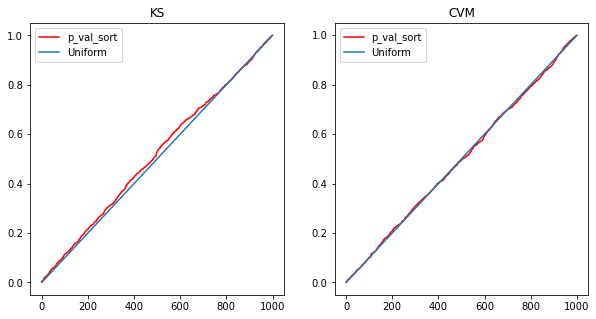

In [25]:
it = 1000
pv_lst_ks= [kstest(norm.rvs(size=100), 'norm').pvalue for i in range(it)]
pv_lst_cvm = [cramervonmises(norm.rvs(size=100), 'norm').pvalue for i in range(it)]
pv_lst_ks.sort()
pv_lst_cvm.sort()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(it), pv_lst_ks, color='red', label='p_val_sort')
plt.plot(range(it), [i/it for i in range(it)], label='Uniform')
plt.title('KS')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(it), pv_lst_cvm, color='red', label='p_val_sort')
plt.plot(range(it), [i/it for i in range(it)], label='Uniform')
plt.title('CVM')
plt.legend()
plt.show()

## Проверка гипотезы
### $H_0$ : выборка из нормального распределения с известными параметрами
### $H_1$ : выборка из смеси нормальных распределений с различными известными параметрами

#### KS

In [42]:
def bimodal_cdf(x, weight_1, a_1, sigma_1, a_2, sigma_2):
    #Функция распределения для смеси нормальных распределений
    return (weight_1*norm.cdf(x, a_1, sigma_1) + (1 - weight_1)*norm.cdf(x, a_2, sigma_2))

a_0 = 3.5
sigma_0 = 1.5
weight_1 = 0.6
a_1 = 3
sigma_1 = 1
a_2 = 4
sigma_2 = 2

n = 200
n_1 = np.random.binomial(n, p=weight_1)

# выборка из нормального распределения с параметрами a_0 и sigma_0
sample_1 = norm.rvs(a_0, sigma_0, size=n)

# выборка из смеси нормальных распределений с параметрами a_1, sigma_1 и a_2, sigma_2
sample_2 = np.concatenate((norm.rvs(a_1, sigma_1, size=n_1), (norm.rvs(a_2, sigma_2, size=n - n_1))))

print('===KS-TEST===')
print('\n')
print('=Sample_1=')
print('\n')
print('Проверка нулевой гипотезы')

pvalue_ks_0 = kstest(sample_1, 'norm', args=(a_0, sigma_0)).pvalue
print('p-value =', pvalue_ks_0)
print('\n')
print('Проверка альтернативы')

pvalue_ks_1 = kstest(sample_1, cdf=bimodal_cdf, args=(weight_1, a_1, sigma_1, a_2, sigma_2)).pvalue
print('p-value =', pvalue_ks_1)
print('\n')
print('=Sample_2=')
print('\n')
print('Проверка нулевой гипотезы')

pvalue_ks_0 = kstest(sample_2, 'norm', args=(a_0, sigma_0)).pvalue
print('p-value =', pvalue_ks_0)
print('\n')
print('Проверка альтернативы')

pvalue_ks_1 = kstest(sample_2, cdf=bimodal_cdf, args=(weight_1, a_1, sigma_1, a_2, sigma_2)).pvalue
print('p-value =', pvalue_ks_1)

===KS-TEST===


=Sample_1=


Проверка нулевой гипотезы
p-value = 0.7755884747572315


Проверка альтернативы
p-value = 0.009289732695621198


=Sample_2=


Проверка нулевой гипотезы
p-value = 0.004931344707404404


Проверка альтернативы
p-value = 0.20071032971464575


#### CVM

In [43]:
print('===CVM-TEST===')
print('\n')
print('=Sample_1=')
print('\n')
print('Проверка нулевой гипотезы')

pvalue_ks_0 = cramervonmises(sample_1, 'norm', args=(a_0, sigma_0)).pvalue
print('p-value =', pvalue_ks_0)
print('\n')
print('Проверка альтернативы')

pvalue_ks_1 = cramervonmises(sample_1, cdf=bimodal_cdf, args=(weight_1, a_1, sigma_1, a_2, sigma_2)).pvalue
print('p-value =', pvalue_ks_1)
print('\n')
print('=Sample_2=')
print('\n')
print('Проверка нулевой гипотезы')

pvalue_ks_0 = cramervonmises(sample_2, 'norm', args=(a_0, sigma_0)).pvalue
print('p-value =', pvalue_ks_0)
print('\n')
print('Проверка альтернативы')

pvalue_ks_1 = cramervonmises(sample_2, cdf=bimodal_cdf, args=(weight_1, a_1, sigma_1, a_2, sigma_2)).pvalue
print('p-value =', pvalue_ks_1)

===CVM-TEST===


=Sample_1=


Проверка нулевой гипотезы
p-value = 0.6703021837564778


Проверка альтернативы
p-value = 0.03950646172507799


=Sample_2=


Проверка нулевой гипотезы
p-value = 0.002178189487001325


Проверка альтернативы
p-value = 0.17851409307027877


Оба теста корректно работают. Если задать, например, $\alpha=0.05$, то для `sample_1` нулевая гипотеза не может быть отвергнута, а альтернатива может. Так и для `sample_2` нулевая гипотеза может быть отвергнута, а альтернатива нет.   

## Сравнение мощностей

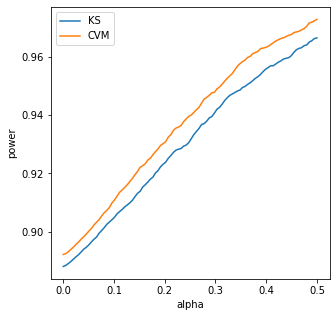

In [76]:
it = 2000
pv_lst_ks = []
pv_lst_cvm = []
x = []
y_1 = []
y_2 = []
for _ in range(it):
    sample = np.concatenate((norm.rvs(a_1, sigma_1, size=n_1), (norm.rvs(a_2, sigma_2, size=n - n_1))))
    pv_lst_ks.append(kstest(sample, 'norm', args=(a_0, sigma_0)).pvalue)
    pv_lst_cvm.append(cramervonmises(sample, 'norm', args=(a_0, sigma_0)).pvalue)
for alpha in np.linspace(0, 0.5, 100):
    power_ks = 1-sum(pv for pv in pv_lst_ks if pv > alpha)/it
    power_cvm = 1-sum(pv for pv in pv_lst_cvm if pv > alpha)/it
    x.append(alpha)
    y_1.append(power_ks)
    y_2.append(power_cvm)
    
plt.figure(figsize=(5, 5))
plt.plot(x, y_1, label='KS')
plt.plot(x, y_2, label='CVM')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('power')
plt.show()

Мощность CVM теста выше